In [3]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [4]:
# path to json
DATA_PATH = "data_10.json"

In [5]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [6]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [7]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### ANN

In [8]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1014218 (3.87 MB)
Trainable params: 1014218 (3.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ANN TRAIN

In [11]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 3s 11ms/step - loss: 9.4302 - accuracy: 0.3205 - val_loss: 5.0516 - val_accuracy: 0.3294
Epoch 2/100
219/219 [==============================] - 2s 10ms/step - loss: 2.9699 - accuracy: 0.3845 - val_loss: 2.3260 - val_accuracy: 0.3128
Epoch 3/100
219/219 [==============================] - 2s 10ms/step - loss: 1.8445 - accuracy: 0.3867 - val_loss: 2.0820 - val_accuracy: 0.3762
Epoch 4/100
219/219 [==============================] - 2s 10ms/step - loss: 1.5885 - accuracy: 0.4595 - val_loss: 2.0151 - val_accuracy: 0.4065
Epoch 5/100
219/219 [==============================] - 2s 10ms/step - loss: 1.4297 - accuracy: 0.5124 - val_loss: 2.0518 - val_accuracy: 0.4129
Epoch 6/100
219/219 [==============================] - 2s 10ms/step - loss: 1.2900 - accuracy: 0.5485 - val_loss: 1.9528 - val_accuracy: 0.4536
Epoch 7/100
219/219 [==============================] - 2s 10ms/step - loss: 1.1970 - accuracy: 0.5814 - val_loss: 1.9010 - val_accuracy:

In [12]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

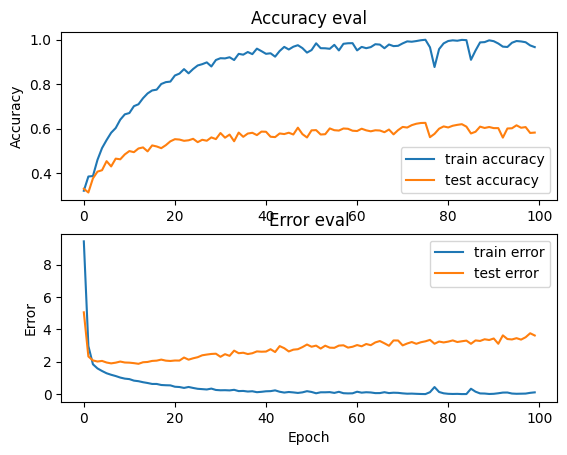

In [13]:
# plot accuracy and error as a function of the epochs
plot_history(history)

### Managing Overfitting

In [14]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 4s 12ms/step - loss: 23.5816 - accuracy: 0.1488 - val_loss: 3.5586 - val_accuracy: 0.1318
Epoch 2/100
219/219 [==============================] - 2s 11ms/step - loss: 6.4931 - accuracy: 0.1408 - val_loss: 3.4925 - val_accuracy: 0.1148
Epoch 3/100
219/219 [==============================] - 2s 11ms/step - loss: 4.5719 - accuracy: 0.1289 - val_loss: 3.5057 - val_accuracy: 0.1041
Epoch 4/100
219/219 [==============================] - 2s 11ms/step - loss: 3.9812 - accuracy: 0.1266 - val_loss: 3.5056 - val_accuracy: 0.1038
Epoch 5/100
219/219 [==============================] - 2s 11ms/step - loss: 3.7758 - accuracy: 0.1268 - val_loss: 3.4842 - val_accuracy: 0.1121
Epoch 6/100
219/219 [==============================] - 2s 11ms/step - loss: 3.6902 - accuracy: 0.1309 - val_loss: 3.4678 - val_accuracy: 0.1185
Epoch 7/100
219/219 [==============================] - 3s 11ms/step - loss: 3.6407 - accuracy: 0.1236 - val_loss: 3.4660 - val_accuracy

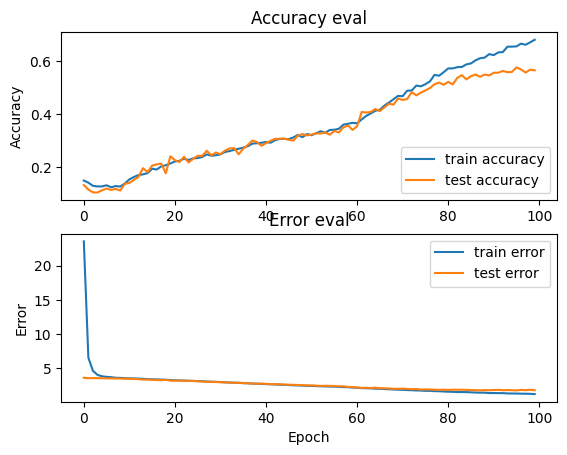

In [17]:
# plot accuracy and error as a function of the epochs
plot_history(history)

# Convolutional Neural Network

In [18]:
#train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [19]:
X_train.shape

(5991, 130, 13, 1)

In [20]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [21]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 6, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 6, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 2, 32)         0         
 g2D)                                                            
                                                      

In [24]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

Epoch 1/100
188/188 [==============================] - 6s 22ms/step - loss: 2.3335 - accuracy: 0.2544 - val_loss: 1.8164 - val_accuracy: 0.3959
Epoch 2/100
188/188 [==============================] - 4s 20ms/step - loss: 1.8361 - accuracy: 0.3645 - val_loss: 1.5262 - val_accuracy: 0.4566
Epoch 3/100
188/188 [==============================] - 4s 20ms/step - loss: 1.6428 - accuracy: 0.4210 - val_loss: 1.4093 - val_accuracy: 0.5007
Epoch 4/100
188/188 [==============================] - 4s 21ms/step - loss: 1.5137 - accuracy: 0.4582 - val_loss: 1.3259 - val_accuracy: 0.5140
Epoch 5/100
188/188 [==============================] - 4s 20ms/step - loss: 1.4291 - accuracy: 0.4937 - val_loss: 1.2517 - val_accuracy: 0.5501
Epoch 6/100
188/188 [==============================] - 4s 20ms/step - loss: 1.3610 - accuracy: 0.5121 - val_loss: 1.1926 - val_accuracy: 0.5688
Epoch 7/100
188/188 [==============================] - 4s 20ms/step - loss: 1.2912 - accuracy: 0.5421 - val_loss: 1.1522 - val_accuracy:

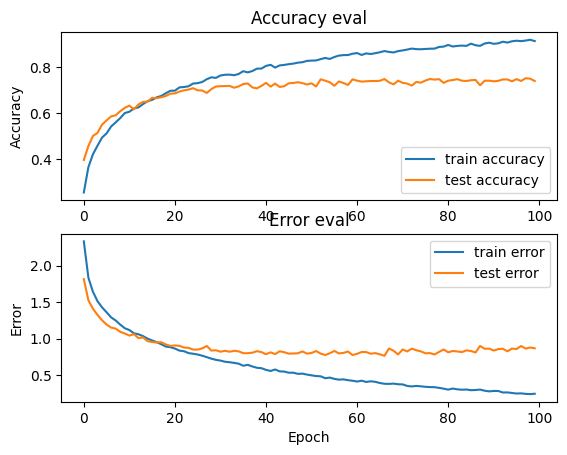

In [25]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [60]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 0.8413 - accuracy: 0.7629 - 608ms/epoch - 8ms/step

Test accuracy: 0.7629154920578003


In [27]:
model_cnn.save("Music_Genre_10_CNN")

INFO:tensorflow:Assets written to: Music_Genre_10_CNN\assets


INFO:tensorflow:Assets written to: Music_Genre_10_CNN\assets


In [28]:
model_cnn.save("Music_Genre_10_CNN.h5")

c:\Users\viswa\OneDrive\Desktop\Code Workplace\Python\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

### Prediction on Test Set

In [30]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [31]:
X_to_predict.shape

(130, 13, 1)

In [32]:
print("Real Genre:", y_to_predict)

Real Genre: 0


In [33]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...]

In [34]:
X_to_predict.shape

(1, 130, 13, 1)

In [35]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

1/1 [==============================] - 0s 179ms/step


In [36]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 0


In [37]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 8
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 3


In [38]:
len(X_test)

2497

In [39]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))



Real Genre: 7
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 7

Real Genre: 6
1/1 [==============================] - 0s 25ms/step
Predicted Genre: 6

Real Genre: 0
1/1 [==============================] - 0s 33ms/step
Predicted Genre: 5

Real Genre: 9
1/1 [==============================] - 0s 32ms/step
Predicted Genre: 0

Real Genre: 0
1/1 [==============================] - 0s 33ms/step
Predicted Genre: 0

Real Genre: 5
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 5

Real Genre: 8
1/1 [==============================] - 0s 32ms/step
Predicted Genre: 3

Real Genre: 3
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 3

Real Genre: 6
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 6

Real Genre: 7
1/1 [==============================] - 0s 27ms/step
Predicted Genre: 7


In [40]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [47]:
genre_dict = {0:"blues",1:"classical",2:"country",3:"disco",4:"hiphop",5:"Jazz",6:"metal",7:"pop",8:"reggae",9:"rock"}

In [53]:
#new_input_mfcc = process_input("GTZAN/genres_original/jazz/jazz.00035.wav", 30)
#new_input_mfcc = process_input("GTZAN/genres_original/metal/metal.00035.wav", 30)
#new_input_mfcc = process_input("GTZAN/genres_original/pop/pop.00015.wav", 30)
#new_input_mfcc = process_input("GTZAN/genres_original/blues/blues.00035.wav", 30)
#new_input_mfcc = process_input("GTZAN/genres_original/disco/disco.00035.wav", 30)
#new_input_mfcc = process_input("GTZAN/genres_original/rock/rock.00035.wav", 30)
#new_input_mfcc = process_input("GTZAN/genres_original/country/country.00035.wav", 30)
#new_input_mfcc = process_input("GTZAN/genres_original/reggae/reggae.00035.wav", 30)
#new_input_mfcc = process_input("GTZAN/genres_original/hiphop/hiphop.00035.wav", 30)
#new_input_mfcc = process_input("GTZAN/genres_original/classical/classical.00035.wav", 30)

In [ ]:
new_input_mfcc = process_input("input2.wav", 30)

In [54]:
type(new_input_mfcc)

numpy.ndarray

In [55]:
new_input_mfcc.shape

(130, 13)

In [56]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [58]:
prediction = model_cnn.predict(X_to_predict)
print("Input Recieved, Beginning Predictions...")
# get index with max value
predicted_index = np.argmax(prediction, axis=1)
print("\n")
print("Predicted Genre:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 32ms/step
Input Recieved, Beginning Predictions...


Predicted Genre: pop
